In [45]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
# Importing Data
data = pd.read_csv("/content/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [48]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [49]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
from sklearn.preprocessing import StandardScaler

X = data.drop('medv', axis=1)
y = data['medv']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

data_normalized = pd.concat([X_normalized, y], axis=1)


In [51]:
data_normalized.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [52]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

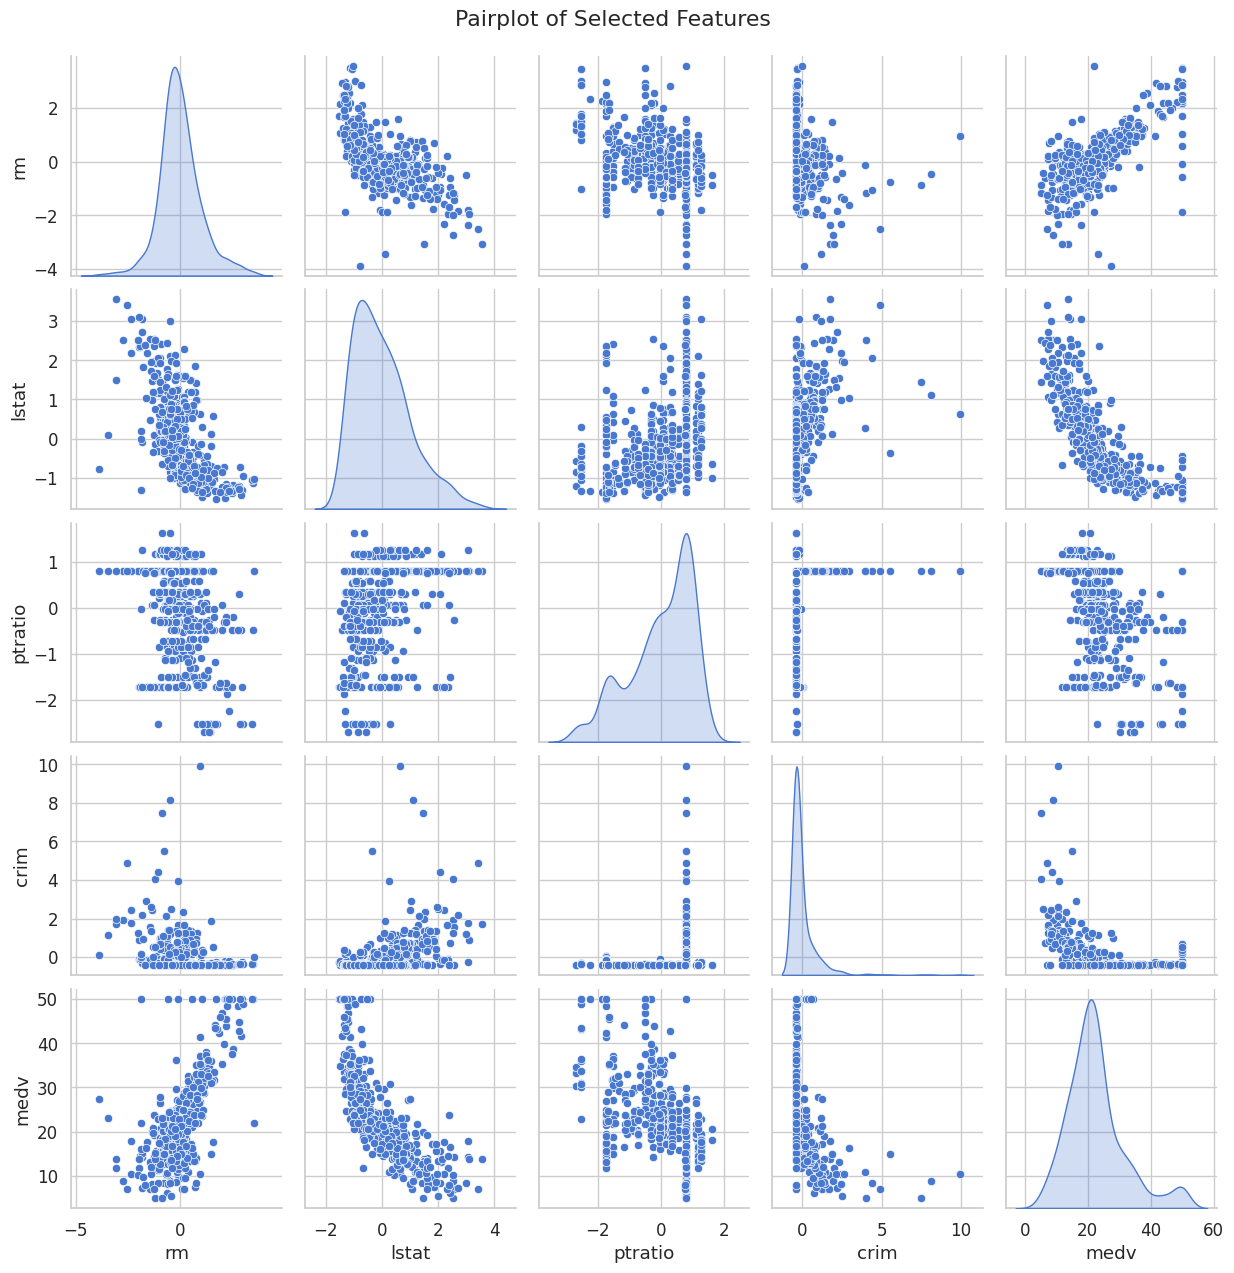

In [53]:
selected_features = ['rm', 'lstat', 'ptratio', 'crim', 'medv']
sns.pairplot(data_normalized[selected_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


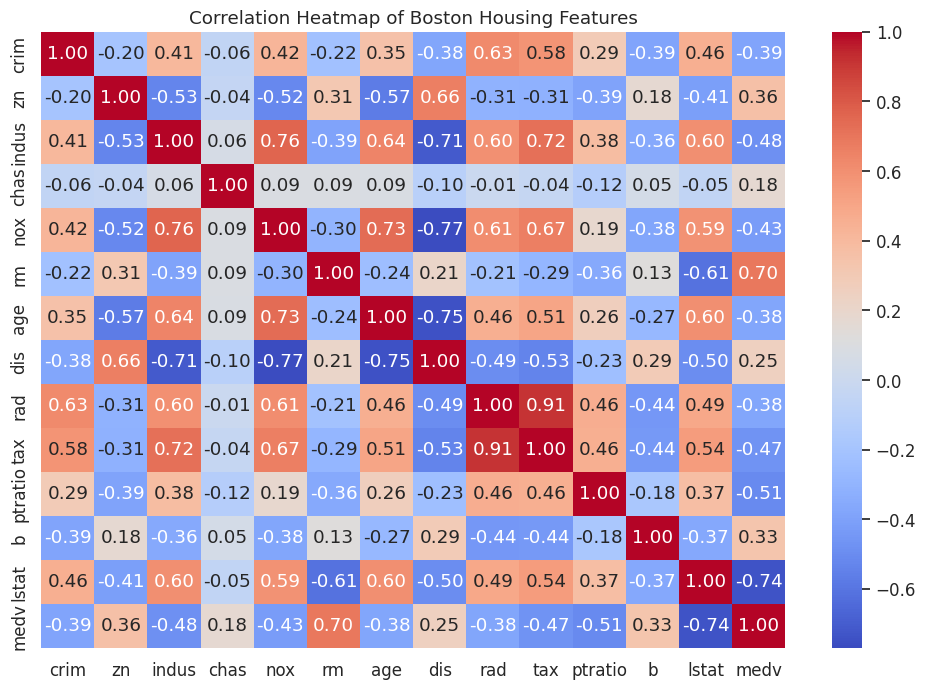

In [54]:
plt.figure(figsize=(12, 8))
correlation = data_normalized.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Boston Housing Features")
plt.show()

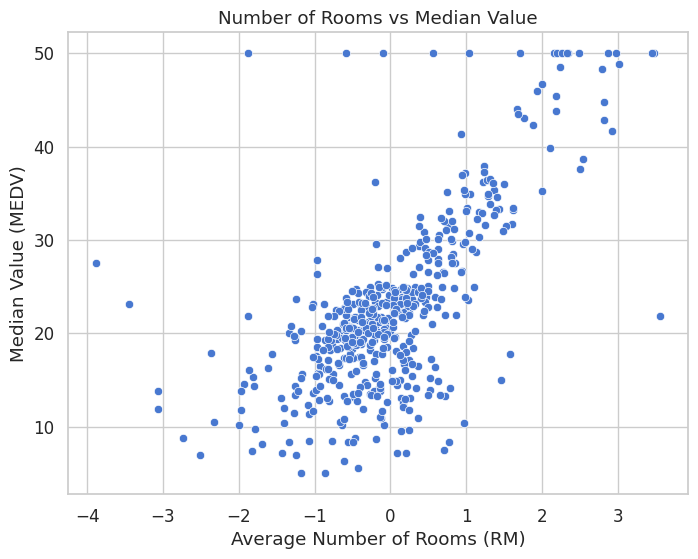

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=data_normalized)
plt.title("Number of Rooms vs Median Value")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value (MEDV)")
plt.show()

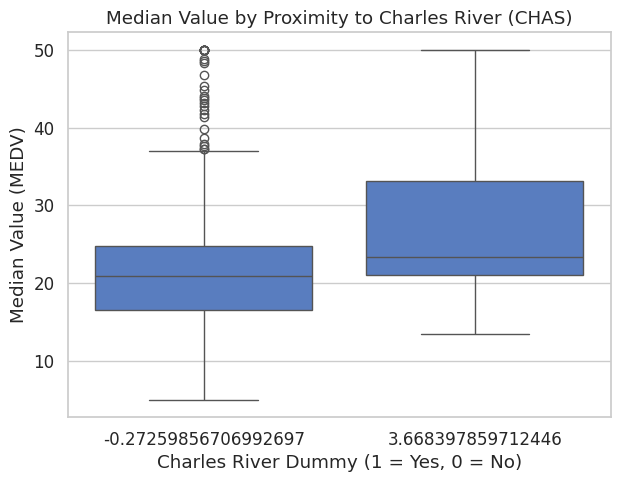

In [56]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='chas', y='medv', data=data_normalized)
plt.title("Median Value by Proximity to Charles River (CHAS)")
plt.xlabel("Charles River Dummy (1 = Yes, 0 = No)")
plt.ylabel("Median Value (MEDV)")
plt.show()

In [57]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

X = data_normalized.drop('medv', axis=1).values
y = data_normalized['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression MSE: {lr_model.mse(y_test, y_pred_lr):.4f}")
print(f"Linear Regression R²: {lr_model.r2_score(y_test, y_pred_lr):.4f}")


Linear Regression MSE: 24.2911
Linear Regression R²: 0.6688


In [58]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_idx, best_val = None, None
        for feature_index in range(X.shape[1]):
            values = np.unique(X[:, feature_index])
            for val in values:
                left_mask = X[:, feature_index] <= val
                right_mask = ~left_mask
                if len(y[left_mask]) < 1 or len(y[right_mask]) < 1:
                    continue
                mse = (len(y[left_mask]) * self._mse(y[left_mask]) +
                       len(y[right_mask]) * self._mse(y[right_mask])) / len(y)
                if mse < best_mse:
                    best_mse = mse
                    best_idx = feature_index
                    best_val = val
        return best_idx, best_val

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < 2:
            return np.mean(y)
        feature_index, threshold = self._best_split(X, y)
        if feature_index is None:
            return np.mean(y)
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return {
            'feature': feature_index,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_row(self, row, node):
        if not isinstance(node, dict):
            return node
        if row[node['feature']] <= node['threshold']:
            return self._predict_row(row, node['left'])
        else:
            return self._predict_row(row, node['right'])

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=5):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, y)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            tree_preds[:, i] = tree.predict(X)
        return np.mean(tree_preds, axis=1)

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

X = data_normalized.drop('medv', axis=1).values
y = data_normalized['medv'].values

# Train-test split manually
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

rf_model = RandomForest(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest MSE: {rf_model.mse(y_test, y_pred_rf):.4f}")
print(f"Random Forest R²: {rf_model.r2_score(y_test, y_pred_rf):.4f}")


Random Forest MSE: 48.4803
Random Forest R²: -0.8030


In [60]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_idx, best_val = None, None
        for feature_index in range(X.shape[1]):
            values = np.unique(X[:, feature_index])
            for val in values:
                left_mask = X[:, feature_index] <= val
                right_mask = ~left_mask
                if len(y[left_mask]) < 1 or len(y[right_mask]) < 1:
                    continue
                mse = (len(y[left_mask]) * self._mse(y[left_mask]) +
                       len(y[right_mask]) * self._mse(y[right_mask])) / len(y)
                if mse < best_mse:
                    best_mse = mse
                    best_idx = feature_index
                    best_val = val
        return best_idx, best_val

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < 2:
            return np.mean(y)
        feature_index, threshold = self._best_split(X, y)
        if feature_index is None:
            return np.mean(y)
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return {
            'feature': feature_index,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_row(self, row, node):
        if not isinstance(node, dict):
            return node
        if row[node['feature']] <= node['threshold']:
            return self._predict_row(row, node['left'])
        else:
            return self._predict_row(row, node['right'])

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

class XGBoostFromScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full_like(y, np.mean(y), dtype=np.float32)
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            tree_preds = tree.predict(X)
            y_pred += self.learning_rate * tree_preds
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), np.mean(y), dtype=np.float32)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

X = data_normalized.drop('medv', axis=1).values
y = data_normalized['medv'].values

# Train-test split manually
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

xgb_model = XGBoostFromScratch(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost MSE: {xgb_model.mse(y_test, y_pred_xgb):.4f}")
print(f"XGBoost R²: {xgb_model.r2_score(y_test, y_pred_xgb):.4f}")


XGBoost MSE: 18.8239
XGBoost R²: 0.2999


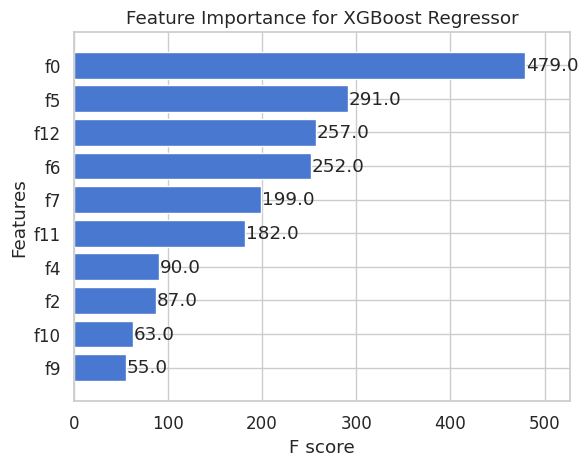

In [61]:
import xgboost as xgb
# Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
xgb_model.fit(X_train, y_train)

# Plot feature importances using XGBoost's built-in method
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance for XGBoost Regressor')
plt.show()
